In [1]:
# MNIST dataset

In [2]:
## 1. Importing the Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

In [4]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [5]:
## 2. Preprocessing the Data

In [6]:
X_train=X_train.reshape(60000, 28, 28, 1)
X_test=X_test.reshape(10000, 28, 28, 1)

In [8]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [10]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
## 3. Building th CNN

In [13]:
cnn=tf.keras.models.Sequential()

In [ ]:
### a. Convolution Layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

In [ ]:
### b. Pooling

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
### c. Adding the Second Convolution Layer

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
### d. Flatten

In [18]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
### e. Full Connection 

In [19]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
### f. Output Layer

In [20]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
## 4. Training the CNN

In [22]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=25)

Epoch 1/25
1875/1875 [==============================] - 24s 12ms/step - loss: 1.2073 - accuracy: 0.8796 - val_loss: 0.0942 - val_accuracy: 0.9742
Epoch 2/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 3/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0589 - val_accuracy: 0.9824
Epoch 4/25
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.0512 - val_accuracy: 0.9832
Epoch 5/25
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 6/25
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0536 - val_accuracy: 0.9853
Epoch 7/25
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0568 -

In [ ]:
## 5. Predictions

In [32]:
from keras.preprocessing import image
img=X_test[2]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
#print(result)
print(pred)

1


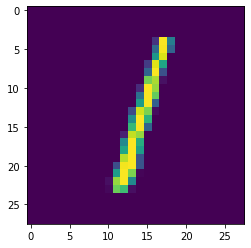

In [29]:
plt.imshow(X_test[2])
plt.show()